Karinn Murdock

03/14/2022

# The Evolution of Music Industry Sales

## Introduction

For my final project, I am exploring the music industry and how it has changed over the years. More specifically, I want to look at how music industry sales have changed in the past 40 years in terms of types of sales (CDs, streaming, etc). In answering this overarching research question, I also want to explore (1) how the rise of new sale formats has led to the demise of others, and (2) which sales formats will be most popular moving forward.

The music industry has seen drastic change in recent years as a result of the Internet and music streaming platforms such as Spotify and Apple Music. Since the industry is changing so quickly, it is difficult for artists, record labels, and other companies to keep up. The topic I am researching is important to both artists and business executives in the music industry as they must understand the current sales landscape in order to maximize sales and cater to customer's preferences. By understanding which sale formats are most popular now, which ones are on the decline, and which ones will be popular in the future, artists and companies can know where to focus their marketing and distribution resources going forward. 

This topic is of interest to me as I'm very passionate about music. Throughout my life, I have witnessed how drastically the way I consume music has changed. Additionally, I am extremely interested in the music industry and would love to work on the business side of the music industry after graduation. By understanding how music industry sales and consumer preferences have changed, I hope I will be able to have a better understanding of where the industry is going. 

## Methods

The data source I will use to explore my research question is a dataset I found on data.world. This dataset is on music industry sales over the past 40 years and was created by the Recording Industry Association of America (RIAA). According to RIAA, this is the most comprehensive data on U.S. recorded music revenues. This dataset goes all the way back to 1973 and lists format of sale, metric of sale, year of sale, and value of sale. A link to the dataset can be found here: https://data.world/makeovermonday/2020w21-visualizing-40-years-of-music-industry-sales

This dataset contains data on 23 different sales formats, from cassette sales to album sales to on-demand streaming sales. For each format (except a few), the sales value is listed for each year in three different metrics: units sold, revenue at time of sale, and revenue adjusted to present value. The "Value (Actual)" column is displayed in millions for both unit values and revenue values. 

As stated in my introduction, I intend to analyze how music industry sales have changed since 1973 in terms of type of sales, as well as and how new sales formats have affected older sales formats. For my analysis, I decided to only work with the revenue adjusted to present value data, as I found it to be the most insightful. I split my analysis roughly into 5 main steps. First, I am creating bar charts of every sales formats in order to understand how sales of each format have changed since 1973. Second, I am going to create pie charts at different points in time to see how the composition of music sales has changed. Third, I am going to look at the correlation of different sales formats in the 2000's to understand which formats are correlated and which are anti-correlated. To take this analysis one step further, I am going to conduct linear regression analysis. Lastly, I am going to look at the growth rates of particular sales formats in 2019 to reveal which formats are increasing in popularity. 

## Results

In [228]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import ipywidgets
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Data Exploration

In [229]:
df = pd.read_csv('MusicData2.csv')

In [230]:
df.shape

(3008, 5)

The dataset has 5 columns and 3008 rows of data.

In [231]:
df.columns

Index(['Format', 'Metric', 'Year', 'Number of Records', 'Value (Actual)'], dtype='object')

Looking at the first 5 entries:

In [232]:
df.head()

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1973,1,NaN
1,CD,Units,1974,1,NaN
2,CD,Units,1975,1,NaN
3,CD,Units,1976,1,NaN
4,CD,Units,1977,1,NaN


Looking at the last 5 entries:

In [233]:
df.tail()

,Format,Metric,Year,Number of Records,Value (Actual)
3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,Vinyl Single,Value (Adjusted),2018,1,5.386197
3007,Vinyl Single,Value (Adjusted),2019,1,6.795946


In [234]:
df.dtypes

Format                object
Metric                object
Year                   int64
Number of Records      int64
Value (Actual)       float64
dtype: object

Finding summary statistics:

In [235]:
df.describe()

,Year,Number of Records,Value (Actual)
count,3008.000000,3008.0,1351.000000
mean,1996.000000,1.0,781.291237
std,13.566915,0.0,2246.837672
min,1973.000000,1.0,-7.650944
25%,1984.000000,1.0,3.700228
50%,1996.000000,1.0,63.900000
75%,2008.000000,1.0,448.900000
max,2019.000000,1.0,19667.327790


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Format             3008 non-null   object 
 1   Metric             3008 non-null   object 
 2   Year               3008 non-null   int64  
 3   Number of Records  3008 non-null   int64  
 4   Value (Actual)     1351 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 117.6+ KB


In [237]:
df

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1973,1,NaN
1,CD,Units,1974,1,NaN
2,CD,Units,1975,1,NaN
3,CD,Units,1976,1,NaN
4,CD,Units,1977,1,NaN
...,...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,Vinyl Single,Value (Adjusted),2018,1,5.386197


Looking at the data, the column "Value (Actual)" has missing information for many of the data entries. Additionally, it seems some of the data in the "Value (Actual)" column is measuring sales based on units sold while other entries are measuring sales by revenue.

### Cleaning the Data

First, I am replacing all NaN values with a zero.

In [238]:
new_df = df.fillna(0)
new_df

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1973,1,0.000000
1,CD,Units,1974,1,0.000000
2,CD,Units,1975,1,0.000000
3,CD,Units,1976,1,0.000000
4,CD,Units,1977,1,0.000000
...,...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,Vinyl Single,Value (Adjusted),2018,1,5.386197


In some of the earlier years, certain formats such as Ringtones hadn't been created yet. I don't want to include these sales formats in my dataset for the years when the value is 0.0, so I am creating a new dataframe with these values removed.

In [239]:
new_df_no_values_0 = new_df[new_df["Value (Actual)"] != 0.0].reset_index(drop=True)
new_df_no_values_0

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1983,1,0.800000
1,CD,Units,1984,1,5.800000
2,CD,Units,1985,1,22.600000
3,CD,Units,1986,1,53.000000
4,CD,Units,1987,1,102.100000
...,...,...,...,...,...
1269,Vinyl Single,Value (Adjusted),2015,1,6.205390
1270,Vinyl Single,Value (Adjusted),2016,1,5.198931
1271,Vinyl Single,Value (Adjusted),2017,1,6.339678
1272,Vinyl Single,Value (Adjusted),2018,1,5.386197


There are only 1274 rows now (in comparison to 3008 rows before) since some of the rows were irrelevant. 

Creating a dataframe that has the units sold data for each year and format:

In [240]:
units = new_df_no_values_0[new_df_no_values_0['Metric'] == 'Units']
units

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1983,1,0.8
1,CD,Units,1984,1,5.8
2,CD,Units,1985,1,22.6
3,CD,Units,1986,1,53.0
4,CD,Units,1987,1,102.1
...,...,...,...,...,...
397,Paid Subscriptions,Units,2014,1,7.7
398,Paid Subscriptions,Units,2015,1,10.8
399,Paid Subscriptions,Units,2016,1,22.7
400,Paid Subscriptions,Units,2017,1,35.3


In [241]:
len(list(set(units["Format"])))

17

The units sold data contains data on 17 different sales formats.

Creating a dataframe that has the present value of revenue sales data for each year and format:

In [242]:
adjusted = new_df_no_values_0[new_df_no_values_0['Metric'] == 'Value (Adjusted)'].reset_index(drop=True)
adjusted

,Format,Metric,Year,Number of Records,Value (Actual)
0,8 - Track,Value (Adjusted),1973,1,2815.681824
1,8 - Track,Value (Adjusted),1974,1,2848.008609
2,8 - Track,Value (Adjusted),1975,1,2770.409498
3,8 - Track,Value (Adjusted),1976,1,3047.215772
4,8 - Track,Value (Adjusted),1977,1,3421.416287
...,...,...,...,...,...
431,Vinyl Single,Value (Adjusted),2015,1,6.205390
432,Vinyl Single,Value (Adjusted),2016,1,5.198931
433,Vinyl Single,Value (Adjusted),2017,1,6.339678
434,Vinyl Single,Value (Adjusted),2018,1,5.386197


In [243]:
len(list(set(adjusted["Format"])))

23

The value (adjusted) data contains data for 23 different sales format. This dataset is missing units sold data for some of the more recent sales format types, such as On-Demand Streaming and Limited Tier Paid Subscriptions. As a result, I am going to use the value (adjusted) data for my analysis. 

Creating a dataframe that contains revenue sales at time of purchase for each year and format:

In [244]:
value = new_df_no_values_0[new_df_no_values_0['Metric'] == 'Value'].reset_index(drop=True)
value

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Value,1983,1,17.200000
1,CD,Value,1984,1,103.300000
2,CD,Value,1985,1,389.500000
3,CD,Value,1986,1,930.100000
4,CD,Value,1987,1,1593.600000
...,...,...,...,...,...
431,Vinyl Single,Value,2015,1,5.752954
432,Vinyl Single,Value,2016,1,4.880680
433,Vinyl Single,Value,2017,1,6.078385
434,Vinyl Single,Value,2018,1,5.290337


### Exploratory Data Visualizations

Creating dataframes with the adjusted revenue sales data for each sales format:

In [245]:
# step 1: get all unique Format types
format_types = list(set(adjusted["Format"]))
format_types
# step 2: create an empty list to input new data_frames
format_dfs = []
# step 3: create all the new data frames and add to list
for i in np.arange(len(format_types)):
    first_format_type = format_types[i]
    format_df = adjusted[adjusted["Format"] == first_format_type]
    format_dfs.append(format_df)

In [246]:
format_dfs[0] = adjusted[adjusted["Format"] == 'Download Music Video']
format_dfs[1] = adjusted[adjusted["Format"] == 'Download Album']
format_dfs[2] = adjusted[adjusted["Format"] == 'Other Ad-Supported Streaming']
format_dfs[3] = adjusted[adjusted["Format"] == 'Paid Subscription']
format_dfs[4] = adjusted[adjusted["Format"] == 'Synchronization']
format_dfs[5] = adjusted[adjusted["Format"] == 'Cassette']
format_dfs[6] = adjusted[adjusted["Format"] == 'On-Demand Streaming (Ad-Supported)']
format_dfs[7] = adjusted[adjusted["Format"] == 'Limited Tier Paid Subscription']
format_dfs[8] = adjusted[adjusted["Format"] == 'Ringtones & Ringbacks']
format_dfs[9] = adjusted[adjusted["Format"] == '8 - Track']
format_dfs[10] = adjusted[adjusted["Format"] == 'CD']
format_dfs[11] = adjusted[adjusted["Format"] == 'Vinyl Single']
format_dfs[12] = adjusted[adjusted["Format"] == 'CD Single']
format_dfs[13] = adjusted[adjusted["Format"] == 'Kiosk']
format_dfs[14] = adjusted[adjusted["Format"] == 'DVD Audio']
format_dfs[15] = adjusted[adjusted["Format"] == 'SACD']
format_dfs[16] = adjusted[adjusted["Format"] == 'Other Digital']
format_dfs[17] = adjusted[adjusted["Format"] == 'Other Tapes']
format_dfs[18] = adjusted[adjusted["Format"] == 'SoundExchange Distributions']
format_dfs[19] = adjusted[adjusted["Format"] == 'LP/EP']
format_dfs[20] = adjusted[adjusted["Format"] == 'Download Single']
format_dfs[21] = adjusted[adjusted["Format"] == 'Cassette Single']
format_dfs[22] = adjusted[adjusted["Format"] == 'Music Video (Physical)']

Creating dataframes containing graph titles for each sales format:

In [247]:
name_dfs = list(set(adjusted["Format"]))
name_dfs[0] = 'Download Music Video Sales'
name_dfs[1] = 'Download Album Sales'
name_dfs[2] = 'Other Ad-Supported Streaming Sales'
name_dfs[3] = 'Paid Subscription Sales'
name_dfs[4] = 'Synchronization Sales'
name_dfs[5] = 'Cassette Sales'
name_dfs[6] = 'On-Demand Streaming (Ad-Supported) Sales'
name_dfs[7] = 'Limited Tier Paid Subscription Sales'
name_dfs[8] = 'Ringtones & Ringbacks Sales'
name_dfs[9] = '8 - Track Sales'
name_dfs[10] = 'CD Sales'
name_dfs[11] = 'Vinyl Single Sales'
name_dfs[12] = 'CD Single Sales'
name_dfs[13] = 'Kiosk Sales'
name_dfs[14] = 'DVD Audio Sales'
name_dfs[15] = 'SACD Sales'
name_dfs[16] = 'Other Digital Sales'
name_dfs[17] = 'Other Tapes Sales'
name_dfs[18] = 'SoundExchange Distributions Sales'
name_dfs[19] = 'LP/EP Sales'
name_dfs[20] = 'Download Single Sales'
name_dfs[21] = 'Cassette Single Sales'
name_dfs[22] = 'Music Video (Physical) Sales'

In [248]:
def widgetplot(x):
    p = format_dfs[x].plot(kind='bar', x='Year', y='Value (Actual)', figsize=(10,6))

    p.set_title(name_dfs[x], fontsize=14)
    p.set_xlabel('Year', fontsize=13)
    p.set_ylabel('Revenue ($ in millions)', fontsize=13)
    p.legend(['Revenue (in millions, adjusted to PV)'])
    plt.show()
ipywidgets.interactive(widgetplot, x=(0,22))

interactive(children=(IntSlider(value=11, description='x', max=22), Output()), _dom_classes=('widget-interact'…

Starting with **Download Music Video sales** (x=0), Download Music Video sales began in 2005 and peaked in 2008/2009, before significantly declining. In 2019, Download Music Video sales were just under $2 million. 

**Download Album sales** (x=1) began in 2004, peaked in 2013, and have been declining since. However, it still remains a popular format as sales in 2019 were over $394 million. 

**Other Ad-Supported Streaming sales** (x=2) weren't introduced until 2016. Sales were highest in 2017 and have declined slightly since but still remain a popular format, accounting for over $251 million in sales in 2019.

**Paid Subscription sales** (x=3), which became available in 2005, have significantly increased in recent years. Paid Subscription sales were highest in 2019, making up over $5.9 billion in sales.

**Synchronization sales** (x=4) started in 2009 and have been relatively constant since with a slight increase in the last few years. In 2019, Synchronization sales were around $276 million.

**Cassette sales** (x=5) peaked in 1988 and have decreased significantly since. Data on Cassette sales is not reported after 2008, as cassettes lost popularity. 

**On-Demand Streaming (Ad-Supported) sales** (x=6) began in 2011 and have been increasing every year since. In 2019, On-Demand Streaming sales exceeded $908 million.

**Limited Tier Paid Subscription sales** (x=7) began in 2016 and have also been increasing every year since. Limited Tier Paid Subscription sales were over $829 mil in 2019.

**Ringtones and Ringbacks** (x=8) were introduced in 2005. Sales peaked shortly after in 2007 and have decreased significantly since. In 2019, Ringtones and Ringbacks sales were around $21 million. 

**8-Track sales** (x=9) peaked in 1978 before decreasing. Data for 8-Tracks sales stopped after 1982, as this format lost popularity. 

**CD sales** (x=10) began in 1983 and peaked in 1999/2000. CD sales have decreased significantly since yet remain a popular sales format, with over $614 million in sales in 2019. 

**Vinyl Single sales** (x=11) peaked in 1979 and have decreased significantly since, but still remain a used sales format. Vinyl Single sales is one of the sales formats that has been around the longest in the industry. In 2019, sales of Vinyl Singles were around $6.8 million.

**CD Single sales** (x=12) data begins in 1988 and peaked in 1997. CD Single sales declined significantly after 1997. In 2018 and 2019, CD Single sales have been under $1 million.  

**Kiosk sales** (x=13) began in 2005 and peaked in 2009/2010 before declining. There was a resurgence of Kiosk sales in 2013 followed by another decline. In 2019, Kiosk sales were around $1.5 million.

**DVD Audio sales** (x=14) started in 2001 and peaked in 2005. Sales dropped significantly between 2011-2013 and have increased slightly since. In 2019, DVD Audio sales totaled just over $1 million.

**SACD sales** (x=15) became available in 2003 and also peaked in 2003. Since 2003, SACD sales have dropped sharply, accounting for less than half a million in sales in 2019.

**Other Digital sales** (x=16) were introduced in 2016 and have been increasing slightly since. In 2019, sales were around $21.5 million.

**Other Tapes sales** (x=17) began in 1973 and only lasted until 1976. Other Tapes sales peaked in 1973.

**SoundExchange Distributions sales** (x=18) began in 2004 and have been increasing for the most part since. In 2019, SoundExchange Distributions sales were over $908 million.

**LP/EP sales** (x=19) peaked in 1978 before declining sharply. Around 2008 LP/EP sales began to slowly climb again, yet sales still remain much lower than seen in the 1970s. In 2019, LP/EP sales were over $497 million. 

**Download Single sales** (x=20) were introduced in 2004 and peaked in 2012. Since 2012, Download Single sales have been declining but still remain a popular format, accounting for over $414 million in sales in 2019.

**Cassette Single sales** (x=21) began in 1987 and peaked in 1992. Data on Cassette Single sales ends in 2002, as sales sharply declined to below $1 million.

**Music Video (Physical) sales** (x=22) became available in 1989 and saw peak sales in 1998 and 2004. Sales have steadily declined since, with 2019 sales around $27 million.

By analyzing these bar charts, we can see which sales formats have seen increased sales in recent years and which ones have seen declining sales. Formats that have seen increased sales recently include Synchronization, Paid Subscriptions, On-Demand Streaming (Ad-Supported), Limited Tier Paid Subscriptions, Other Digital, SoundExchange Distributions, and LP/EP. 

Formats that have seen a decline in sales recently include Download Music Video, Download Album, Other Ad-Supported Streaming, Ringtones and Ringbacks, CDs, Vinyl Singles, CD Singles, Kiosks, DVD Audios, SACDs, Download Single, and Music Video (Physical).

Next, I want to look at how the composition of music industry sales changed from 1973 to 2019. To do this, I am going to look at four different points in time, each 15 years apart.

Looking at the most popular sales formats in 1973:

In [24]:
df_1973 = adjusted[adjusted['Year'] == 1973]

In [25]:
df_1973_index = df_1973.set_index("Format")
df_1973_index

,Metric,Year,Number of Records,Value (Actual)
Format,,,,
8 - Track,Value (Adjusted),1973,1,2815.681824
Cassette,Value (Adjusted),1973,1,437.611081
LP/EP,Value (Adjusted),1973,1,7174.518514
Other Tapes,Value (Adjusted),1973,1,89.825432
Vinyl Single,Value (Adjusted),1973,1,1094.027703


Looking at the most popular sales formats in 1988:

In [26]:
df_1988 = adjusted[adjusted['Year'] == 1988]
df_1988_index = df_1988.set_index("Format")
df_1988_index

,Metric,Year,Number of Records,Value (Actual)
Format,,,,
CD,Value (Adjusted),1988,1,4516.462927
CD Single,Value (Adjusted),1988,1,21.178686
Cassette,Value (Adjusted),1988,1,7315.507276
Cassette Single,Value (Adjusted),1988,1,123.830483
LP/EP,Value (Adjusted),1988,1,1150.132336
Vinyl Single,Value (Adjusted),1988,1,389.860717


Looking at the most popular sales formats in 2003:

In [257]:
df_2003 = adjusted[adjusted['Year'] == 2003]
df_2003_index = df_2003.set_index("Format")
df_2003_index

,Metric,Year,Number of Records,Value (Actual)
Format,,,,
CD,Value (Adjusted),2003,1,15607.443020
CD Single,Value (Adjusted),2003,1,50.019848
Cassette,Value (Adjusted),2003,1,150.198487
DVD Audio,Value (Adjusted),2003,1,11.115522
LP/EP,Value (Adjusted),2003,1,30.150853
Music Video (Physical),Value (Adjusted),2003,1,555.637143
SACD,Value (Adjusted),2003,1,36.542278
Vinyl Single,Value (Adjusted),2003,1,29.872965


Looking at the most popular sales formats in 2018:

In [28]:
df_2018 = adjusted[adjusted['Year'] == 2018]
df_2018_index = df_2018.set_index("Format")
df_2018_index

,Metric,Year,Number of Records,Value (Actual)
Format,,,,
CD,Value (Adjusted),2018,1,711.041239
CD Single,Value (Adjusted),2018,1,0.157981
DVD Audio,Value (Adjusted),2018,1,3.377494
Download Album,Value (Adjusted),2018,1,508.704388
Download Music Video,Value (Adjusted),2018,1,2.261051
Download Single,Value (Adjusted),2018,1,499.316974
Kiosk,Value (Adjusted),2018,1,2.000652
LP/EP,Value (Adjusted),2018,1,426.820187
Limited Tier Paid Subscription,Value (Adjusted),2018,1,760.591366


Plotting the sales data from 1973, 1988, 2003, and 2018:

In [263]:
labels = list(set(df_2003["Format"]))

Text(0.5, 1.0, 'Music Industry Sales in 2018')

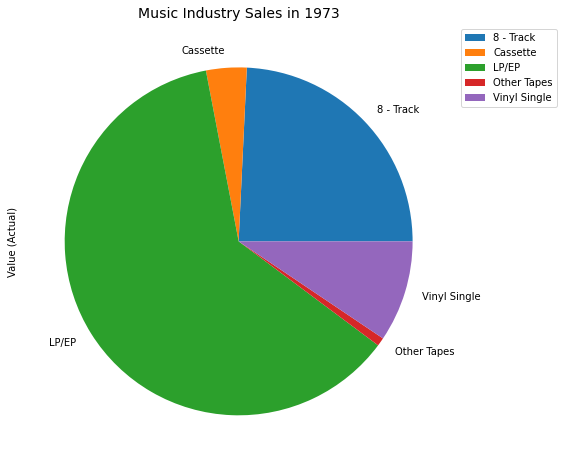

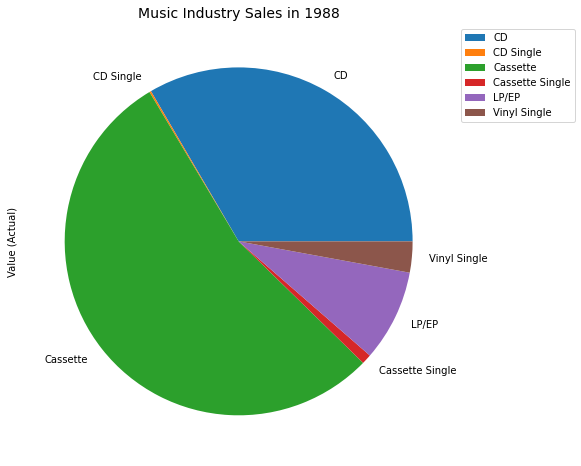

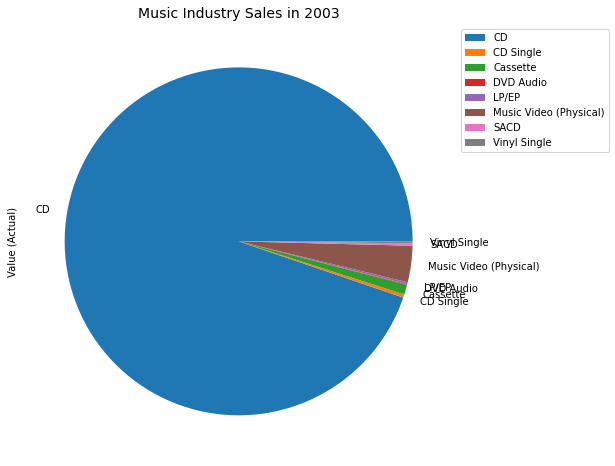

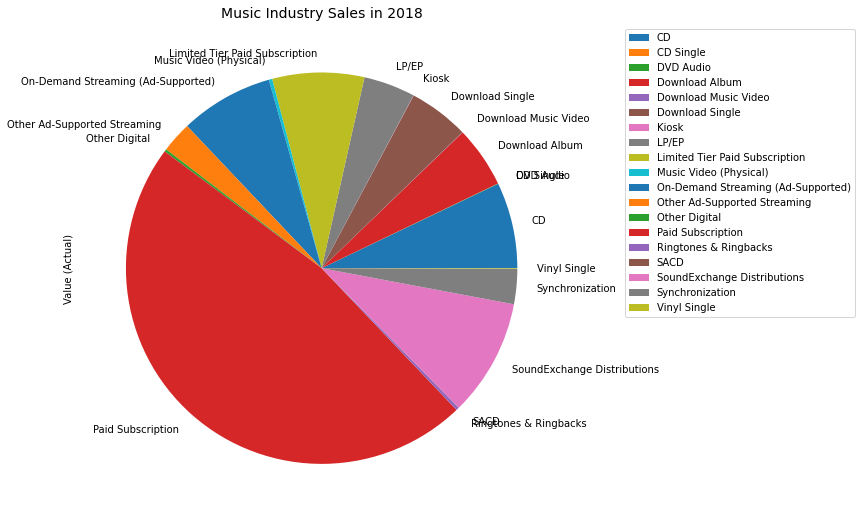

In [279]:
a = df_1973_index.plot(kind='pie', y='Value (Actual)',figsize=(17,8))
plt.legend(bbox_to_anchor=(1.0, 1.0))
a.set_title('Music Industry Sales in 1973', fontsize=14)

b = df_1988_index.plot(kind='pie', y='Value (Actual)',figsize=(17,8))
plt.legend(bbox_to_anchor=(1.0, 1.0))
b.set_title('Music Industry Sales in 1988', fontsize=14)

c = df_2003_index.plot(kind='pie', y='Value (Actual)',figsize=(17,8))
plt.legend(bbox_to_anchor=(1.0, 1.0))
c.set_title('Music Industry Sales in 2003', fontsize=14)

d = df_2018_index.plot(kind='pie', y='Value (Actual)',figsize=(19,9))
plt.legend(bbox_to_anchor=(1.6, 1.0))
d.set_title('Music Industry Sales in 2018', fontsize=14)

Looking at the above pie charts provides insight into the most commonly used sales formats during these four points in time as well as how music industry sales have changed between 1973 and 2018. **In 1973**, the most common music sales format was an LP or EP album, accounting for almost 2/3rds of sales. Other popular sales formats in 1973 included 8-tracks, vinyl singles, cassettes, and other tapes. **In 1988**, the most common music sales format was cassettes, followed by CDs. Cassettes accounted for over half of music sales in 1988. Other common sales formats included LP/EP albums, vinyl singles, cassette singles, and CD singles. 15 years later **in 2003**, the most popular music sales format was by far the CD, making up over 80% of music sales. Other sales formats included physical music videos, cassettes, CD singles, LP/EP albums, super audio CDs, vinyl singles, and dvd audios. 

Most recently, **in 2018**, the most common music sales format was a paid subscription, accounting for a little under half of music sales. Other popular music formats include soundexchange distributions, CDs, on-demand streaming (ad-supported), limited tier paid subscriptions, single downloads, album downloads, LP/EP albums, synchronization, and other ad-supported streaming. Less popular but still used sales formats in 2018 included CD singles, DVD audios, downloading music videos, kiosks, physical music videos, other digital, ringtones and ringbacks, and vinyl singles.

As shown by the charts above, the number of sales formats available to purchase music increased dramatically between 2003 and 2018. In those 15 years, sales of CDs and other physical formats dropped significantly while sales shifted more towards technology-based formats. 

### Correlation Analysis

To begin my analysis, I am going to look at the correlation between different sales formats throughout the 2000's.

Looking at the correlation between **Paid Subscription sales and CD sales** since 2005:

In [32]:
format_dfs[3]

,Format,Metric,Year,Number of Records,Value (Actual)
315,Paid Subscription,Value (Adjusted),2005,1,195.309905
316,Paid Subscription,Value (Adjusted),2006,1,261.490444
317,Paid Subscription,Value (Adjusted),2007,1,288.585326
318,Paid Subscription,Value (Adjusted),2008,1,262.896754
319,Paid Subscription,Value (Adjusted),2009,1,245.722059
320,Paid Subscription,Value (Adjusted),2010,1,249.025694
321,Paid Subscription,Value (Adjusted),2011,1,281.639932
322,Paid Subscription,Value (Adjusted),2012,1,445.276306
323,Paid Subscription,Value (Adjusted),2013,1,706.011657
324,Paid Subscription,Value (Adjusted),2014,1,831.834028


In [33]:
# finding CD sales from 2005 and onwards, since paid subscription sales don't arise until 2005
cds_2005_on = format_dfs[10][format_dfs[10]['Year']>= 2005]

In [34]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(cds_2005_on['Value (Actual)'].reset_index(drop=True)))

-0.5719970540170898


Since 2005, **Paid Subscription sales and CD sales have been negatively correlated**, with a correlation of **-0.57**

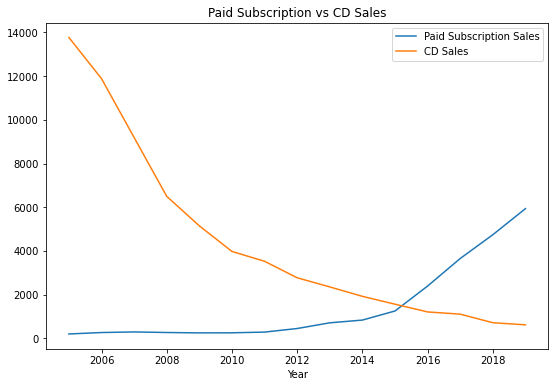

In [35]:
ax = format_dfs[3].plot(kind='line', x='Year', y='Value (Actual)', figsize=(9,6))
cds_2005_on.plot(kind='line', x='Year', y='Value (Actual)', ax=ax)
ax.set_title('Paid Subscription vs CD Sales')
ax.legend(['Paid Subscription Sales', 'CD Sales'])

Since Paid Subscriptions became available in 2005, Paid Subscription sales have been increasing, while CD sales have been decreasing. This makes sense as the two formats are negatively correlated. Prior to 2015, CD sales were higher than Paid Subscription sales. However, since 2015 it appears that Paid Subscription sales have surpassed CD sales.

Looking at the correlation between **On-Demand Streaming sales and CD sales** since 2011:

In [36]:
format_dfs[6]

,Format,Metric,Year,Number of Records,Value (Actual)
294,On-Demand Streaming (Ad-Supported),Value (Adjusted),2011,1,129.340695
295,On-Demand Streaming (Ad-Supported),Value (Adjusted),2012,1,190.339616
296,On-Demand Streaming (Ad-Supported),Value (Adjusted),2013,1,242.396098
297,On-Demand Streaming (Ad-Supported),Value (Adjusted),2014,1,306.475448
298,On-Demand Streaming (Ad-Supported),Value (Adjusted),2015,1,401.245264
299,On-Demand Streaming (Ad-Supported),Value (Adjusted),2016,1,521.288175
300,On-Demand Streaming (Ad-Supported),Value (Adjusted),2017,1,686.918081
301,On-Demand Streaming (Ad-Supported),Value (Adjusted),2018,1,773.294917
302,On-Demand Streaming (Ad-Supported),Value (Adjusted),2019,1,908.149331


In [37]:
# finding CD sales from 2011 and onwards, since on-demand streaming sales didn't arise until 2011
cds_2011_on = format_dfs[10][format_dfs[10]['Year']>= 2011]

In [38]:
print(cds_2011_on['Value (Actual)'].reset_index(drop=True).corr(format_dfs[6]['Value (Actual)'].reset_index(drop=True)))

-0.9323705630229808


Since 2011, **On-Demand Streaming (Ad-Supported) sales and CD sales have been very negatively correlated**, with a correlation of **-0.93**

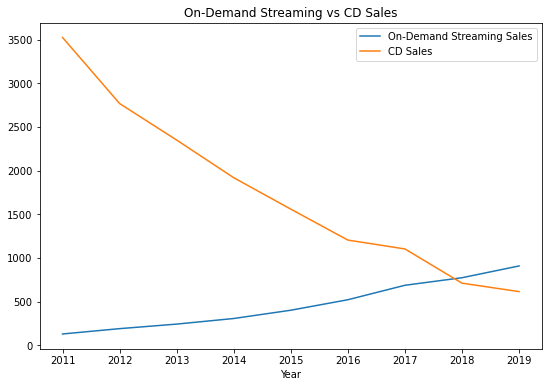

In [39]:
ax = format_dfs[6].plot(kind='line', x='Year', y='Value (Actual)', figsize=(9,6))
cds_2011_on.plot(kind='line', x='Year', y='Value (Actual)', ax=ax)
ax.set_title('On-Demand Streaming vs CD Sales')
ax.legend(['On-Demand Streaming Sales', 'CD Sales'])

Since On-Demand Streaming arose in 2011, On-Demand Streaming sales have been increasing, while CD sales have been decreasing. This is consistent with the results of the correlation analysis. Prior to 2018, CD sales were higher than On-Demand Streaming sales. However, since roughly 2018, On-Demand Streaming sales have surpassed CD sales.

Looking at the correlation between **Paid Subscription sales and Cassette sales** between 2005 and 2008:

In [40]:
# finding paid subscription sales from 2008 and before since the Cassette sales data ends in 2008
ps_before_2008 = format_dfs[3][format_dfs[3]['Year']<=2008]

In [41]:
# finding cassette sales from 2005 and on, since paid subscriptions aren't available until 2005
cassette_2005_on = format_dfs[5][format_dfs[5]['Year']>=2005]

In [42]:
print(ps_before_2008['Value (Actual)'].reset_index(drop=True).corr(cassette_2005_on['Value (Actual)'].reset_index(drop=True)))

-0.9141174644189466


Between 2005 and 2008, **Paid Subscription sales and Cassette sales were very negatively correlated**, with a correlation of **-0.91**

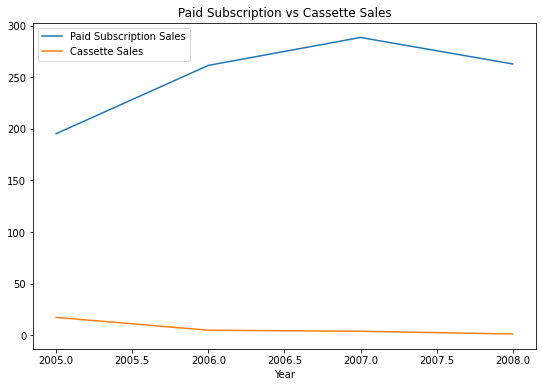

In [43]:
ax = ps_before_2008.plot(kind='line', x='Year', y='Value (Actual)', figsize=(9,6))
cassette_2005_on.plot(kind='line', x='Year', y='Value (Actual)', ax=ax)
ax.set_title('Paid Subscription vs Cassette Sales')
ax.legend(['Paid Subscription Sales', 'Cassette Sales'])

Between 2005 and 2008 (when Paid Subscription and Cassette sales overlapped as sales formats) Paid Subscription sales were significantly higher than Cassette sales. Additionally, Paid Subscription sales increased between 2005 and 2008 while Cassette sales decreased.

Looking at correlation between **Paid Subscription Sales and On-Demand Streaming sales** after 2011: 

In [44]:
format_dfs[6]

,Format,Metric,Year,Number of Records,Value (Actual)
294,On-Demand Streaming (Ad-Supported),Value (Adjusted),2011,1,129.340695
295,On-Demand Streaming (Ad-Supported),Value (Adjusted),2012,1,190.339616
296,On-Demand Streaming (Ad-Supported),Value (Adjusted),2013,1,242.396098
297,On-Demand Streaming (Ad-Supported),Value (Adjusted),2014,1,306.475448
298,On-Demand Streaming (Ad-Supported),Value (Adjusted),2015,1,401.245264
299,On-Demand Streaming (Ad-Supported),Value (Adjusted),2016,1,521.288175
300,On-Demand Streaming (Ad-Supported),Value (Adjusted),2017,1,686.918081
301,On-Demand Streaming (Ad-Supported),Value (Adjusted),2018,1,773.294917
302,On-Demand Streaming (Ad-Supported),Value (Adjusted),2019,1,908.149331


In [45]:
# finding paid subscription sales from 2011 and on, as on-demand streaming begins in 2011
ps_2011_on = format_dfs[3][format_dfs[3]['Year']>=2011]

In [46]:
print(ps_2011_on['Value (Actual)'].reset_index(drop=True).corr(format_dfs[6]['Value (Actual)'].reset_index(drop=True)))

0.9851826999334489


Since 2011, **Paid Subscription sales and On-Demand Streaming sales** have been very highly correlated, with a correlation of **0.98**

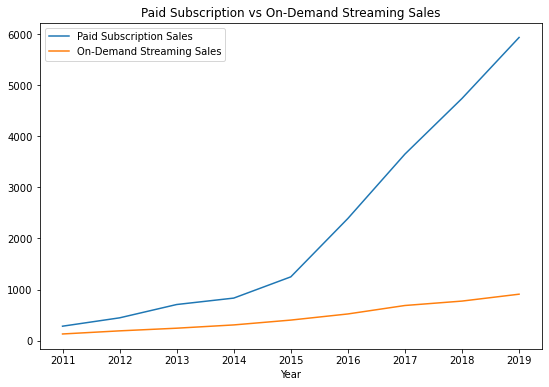

In [47]:
ax = ps_2011_on.plot(kind='line', x='Year', y='Value (Actual)', figsize=(9,6))
format_dfs[6].plot(kind='line', x='Year', y='Value (Actual)', ax=ax)
ax.set_title('Paid Subscription vs On-Demand Streaming Sales')
ax.legend(['Paid Subscription Sales', 'On-Demand Streaming Sales'])

Since 2011, both Paid Subscription sales as well as On-Demand Streaming sales have increased, which makes sense since they are highly correlated. However, Paid Subscription sales increased at a higher rate than On-Demand Streaming sales.

Looking at the correlation between **On-Demand Streaming (Ad-Supported) sales and Other Ad-Supported Streaming sales** after 2016:

In [48]:
format_dfs[2]

,Format,Metric,Year,Number of Records,Value (Actual)
303,Other Ad-Supported Streaming,Value (Adjusted),2016,1,86.559597
304,Other Ad-Supported Streaming,Value (Adjusted),2017,1,273.040319
305,Other Ad-Supported Streaming,Value (Adjusted),2018,1,255.967444
306,Other Ad-Supported Streaming,Value (Adjusted),2019,1,251.064710


In [49]:
# finding on-demand streaming sales since 2016
ods_2016_on = format_dfs[6][format_dfs[6]['Year']>=2016]

In [50]:
print(ods_2016_on['Value (Actual)'].reset_index(drop=True).corr(format_dfs[2]['Value (Actual)'].reset_index(drop=True)))

0.767500469481728


Since 2016, when Other Ad-Supported Streaming became an option, **Other Ad-Supported Streaming sales and On-Demand Streaming (Ad-Supported) have been highly correlated**, with a correlation of **0.77**

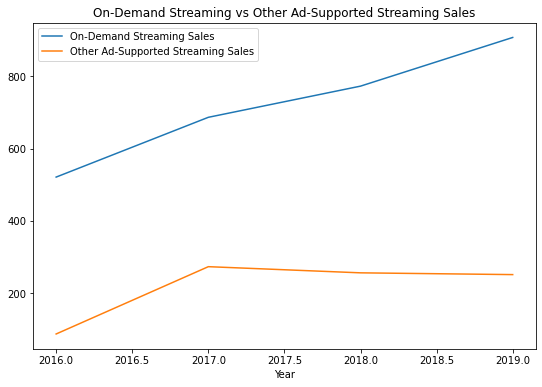

In [51]:
ax = ods_2016_on.plot(kind='line', x='Year', y='Value (Actual)', figsize=(9,6))
format_dfs[2].plot(kind='line', x='Year', y='Value (Actual)', ax=ax)
ax.set_title('On-Demand Streaming vs Other Ad-Supported Streaming Sales')
ax.legend(['On-Demand Streaming Sales', 'Other Ad-Supported Streaming Sales'])

Since 2016, both On-Demand Streaming (Ad-Supported) sales and Other Ad-Supported Streaming sales have increased, which is consistent with the correlation results. Despite both sales formats increasing, On-Demand Streaming (Ad-Supported) sales were higher than Other Ad-Supported Streaming sales between 2016 and 2019. 

Looking at the correlation between **On-Demand Streaming (Ad-Supported) Sales and Download Album sales** since 2011:

In [52]:
format_dfs[6]

,Format,Metric,Year,Number of Records,Value (Actual)
294,On-Demand Streaming (Ad-Supported),Value (Adjusted),2011,1,129.340695
295,On-Demand Streaming (Ad-Supported),Value (Adjusted),2012,1,190.339616
296,On-Demand Streaming (Ad-Supported),Value (Adjusted),2013,1,242.396098
297,On-Demand Streaming (Ad-Supported),Value (Adjusted),2014,1,306.475448
298,On-Demand Streaming (Ad-Supported),Value (Adjusted),2015,1,401.245264
299,On-Demand Streaming (Ad-Supported),Value (Adjusted),2016,1,521.288175
300,On-Demand Streaming (Ad-Supported),Value (Adjusted),2017,1,686.918081
301,On-Demand Streaming (Ad-Supported),Value (Adjusted),2018,1,773.294917
302,On-Demand Streaming (Ad-Supported),Value (Adjusted),2019,1,908.149331


In [53]:
# finding download album sales since 2011 (when On-Demand Streaming became an option)
download_album_2011_on = format_dfs[1][format_dfs[1]['Year']>=2011]

In [54]:
print(download_album_2011_on['Value (Actual)'].reset_index(drop=True).corr(format_dfs[6]['Value (Actual)'].reset_index(drop=True)))

-0.9715897248193843


Since 2011, **Download Album sales and On-Demand Streaming (Ad-Supported) sales have been very negatively correlated**, with a correlation of **-0.97**

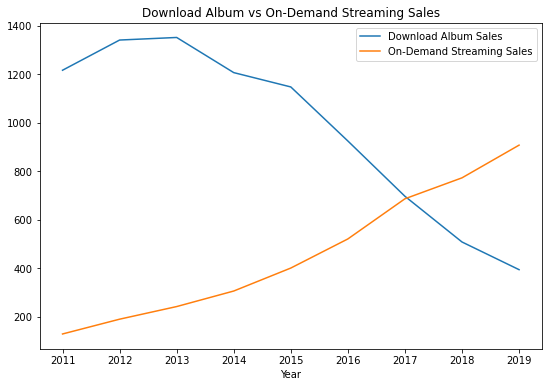

In [55]:
ax = download_album_2011_on.plot(kind='line', x='Year', y='Value (Actual)', figsize=(9,6))
format_dfs[6].plot(kind='line', x='Year', y='Value (Actual)', ax=ax)
ax.set_title('Download Album vs On-Demand Streaming Sales')
ax.legend(['Download Album Sales', 'On-Demand Streaming Sales'])

Since 2011, On-Demand Streaming sales have been increasing, while Download Album sales have been decreasing. This makes sense since the two formats are negatively correlated. Prior to 2017, Download Album sales were higher than On-Demand Streaming sales. However, after 2017 On-Demand Streaming sales surpassed Download Album sales.

Looking at the correlation between **Download Music Video sales and Download Album sales**:

In [56]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[1]['Value (Actual)'].reset_index(drop=True)))

-0.07942243204594712


I assumed **Download Music Video sales and Download Album sales** would be positivley correlated as they are both sales formats that involve downloading. However they are **barely correlated**, with a slight negative correlation of **-0.08**

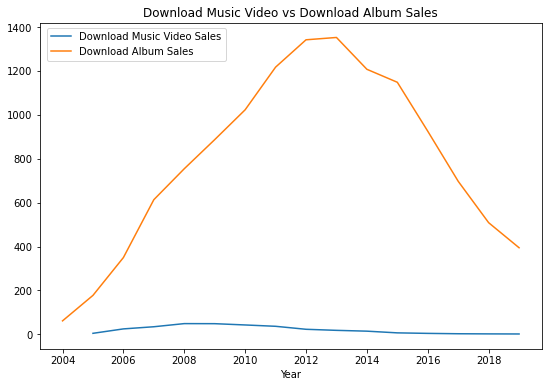

In [57]:
ax = format_dfs[0].plot(kind='line', x='Year', y='Value (Actual)', figsize=(9,6))
format_dfs[1].plot(kind='line', x='Year', y='Value (Actual)', ax=ax)
ax.set_title('Download Music Video vs Download Album Sales')
plt.legend(['Download Music Video Sales', 'Download Album Sales'], bbox_to_anchor=(0.38, 1.0),)

Since 2004, Download Album sales have been higher than Download Music Video sales. Between 2004 and now, Download Music Video Sales slightly decreased, while Download Album sales increased until roughly 2013, and have been decreasing ever since.

Looking at the correlation between **CD Single sales and Download Single sales** after 2004:

In [58]:
# finding CD single sales since 2004 (when download singles became available)
cd_single_2004_on = format_dfs[12][format_dfs[12]['Year']>=2004]

In [59]:
print(cd_single_2004_on['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

-0.4073087892744402


Since 2004, **CD Single sales and Download Single sales have been negatively correlated**, with a correlation of **-0.4**

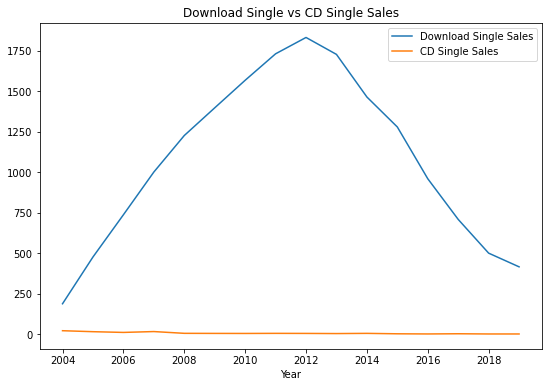

In [60]:
ax = format_dfs[20].plot(kind='line', x='Year', y='Value (Actual)', figsize=(9,6))
cd_single_2004_on.plot(kind='line', x='Year', y='Value (Actual)', ax=ax)
ax.set_title('Download Single vs CD Single Sales')
ax.legend(['Download Single Sales', 'CD Single Sales'])

Since 2004, Download Single sales have been higher than CD Single sales. Between 2004 and now, CD Single Sales slightly decreased, while Download Single sales increased until roughly 2012, and have been decreasing ever since.

Looking at the correlation between **Other Ad-Supported Streaming sales and Limited Tier Paid Subscription sales**:

In [61]:
format_dfs[2]

,Format,Metric,Year,Number of Records,Value (Actual)
303,Other Ad-Supported Streaming,Value (Adjusted),2016,1,86.559597
304,Other Ad-Supported Streaming,Value (Adjusted),2017,1,273.040319
305,Other Ad-Supported Streaming,Value (Adjusted),2018,1,255.967444
306,Other Ad-Supported Streaming,Value (Adjusted),2019,1,251.064710


In [62]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[7]['Value (Actual)'].reset_index(drop=True)))

0.8876592647894722


Since 2016, **Other Ad-Supported Streaming sales and Limited Tier Paid Subscription sales have been highly correlated**, with a correlation of **0.89**

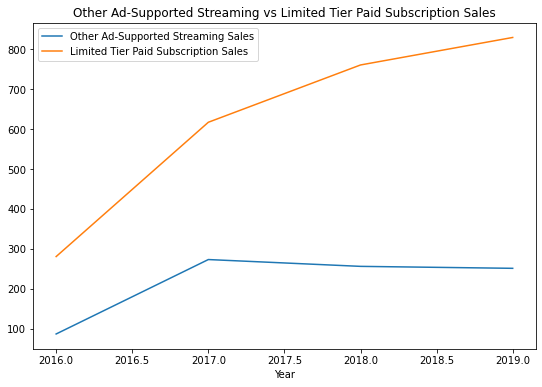

In [63]:
ax = format_dfs[2].plot(kind='line', x='Year', y='Value (Actual)', figsize=(9,6))
format_dfs[7].plot(kind='line', x='Year', y='Value (Actual)', ax=ax)
ax.set_title('Other Ad-Supported Streaming vs Limited Tier Paid Subscription Sales')
ax.legend(['Other Ad-Supported Streaming Sales', 'Limited Tier Paid Subscription Sales'])

Since both Other Ad-Supported Streaming and Limited Tier Paid Subscriptions became available in 2016, both of these sale formats have increased. However, Limited Tier Paid Subscriptions sales have been higher than Other Ad-Supported Streaming sales and also seem to be increasing at a higher rate.

Looking at the correlation between **Paid Subscription sales and SoundExchange Distributions sales**:

In [64]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

0.7744466362621104


Since 2005, **Paid Subscription sales and SoundExchange Distrubtions sales have been highly correlated**, with a correlation of **0.77**

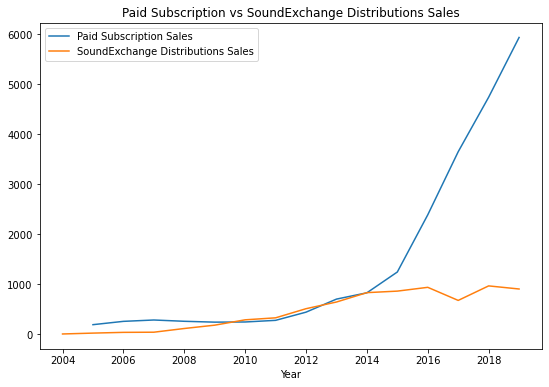

In [65]:
ax = format_dfs[3].plot(kind='line', x='Year', y='Value (Actual)', figsize=(9,6))
format_dfs[18].plot(kind='line', x='Year', y='Value (Actual)', ax=ax)
ax.set_title('Paid Subscription vs SoundExchange Distributions Sales')
ax.legend(['Paid Subscription Sales', 'SoundExchange Distributions Sales'])

Since 2005, both Paid Subscription sales and SoundExchange Distribution sales have increased. However, Paid Subscription sales have increased at a higher rate.

Looking at the correlation between **Download Album sales and Download Single sales**:

In [66]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

0.934879112862656


Since 2004, **Download Album sales and Download Single sales have been highly correlated**, with a correlation of **0.93**

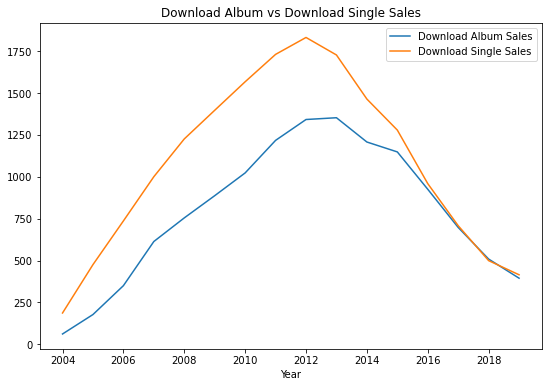

In [67]:
ax = format_dfs[1].plot(kind='line', x='Year', y='Value (Actual)', figsize=(9,6))
format_dfs[20].plot(kind='line', x='Year', y='Value (Actual)', ax=ax)
ax.set_title('Download Album vs Download Single Sales')
ax.legend(['Download Album Sales', 'Download Single Sales'])

Since 2004, Download Album sales and Download Single sales have been very similar. Both sales formats increased until roughly 2012, when they both reached their peak sales and began decreasing. Prior to roughly 2016, Download Single sales were higher than Download Album sales, but since 2016 they have been almost the same.  

Based on the above correlation analysis, sales formats that have been highly correlated in the 2000's include:

(1) Other Ad-Supported Streaming and Limited Tier Paid Subscription sales (r = 0.89)

(2) Paid Subscription and On-Demand Streaming (Ad-Supported) sales (r = 0.98)

(3) On-Demand Streaming (Ad-Supported) and Other Ad-Supported Streaming sales (r = 0.77)

(4) Paid Subscription and SoundExchange Distributions sales (r = 0.77)
 
(5) Download Album and Download Single sales (r = 0.93)

Since these formats have been highly correlated throughout the 2000's, when one of the sales formats has increased, so has the other correlated format. Similarly, if one of the sales formats decreased, the correlated sales format also decreased. 

Sales formats that have been negatively correlated in the 2000's include: 

(1) Paid Subscription and CD sales (r = -0.57)

(2) On-Demand Streaming (Ad-Supported) and CD sales (r = -0.93)

(3) Paid Subscription and Cassette sales (r = -0.91)

(4) On-Demand Streaming (Ad-Supported) and Download Album sales (r = -0.97)

(5) CD Single and Download Single sales (r = -0.4)

Since these formats have been negatively correlated or anti-correlated throughout the 2000's, when one of the sales formats increases, the other sales format decreases. For example, while Paid Subscription sales increased in the 2000's, CD sales decreased in the 2000's. Based on the above correlations, it appears that the newer streaming formats are negatively correlated with some of the older sales formats. As these streaming options increase in sales, their counterparts see decreased sales.

### Linear Regression Analysis

To see how well sales of one format can predict sales of another, correlated format, I am plotting the linear regression of **highly correlated** sales formats. 

Since Other Ad-Supported Streaming and Limited Tier Paid Subscription sales are highly correlated (r=0.89), we might be able to use linear regression to predict Limited Tier Paid Subscription sales from Other Ad-Supported Streaming sales.

In [68]:
X = adjusted[adjusted["Format"] == 'Other Ad-Supported Streaming'][['Value (Actual)']]
Y = adjusted[adjusted["Format"] == 'Limited Tier Paid Subscription'][['Value (Actual)']]
print (X)
print (Y)

     Value (Actual)
303       86.559597
304      273.040319
305      255.967444
306      251.064710
     Value (Actual)
259      280.536691
260      617.032318
261      760.591366
262      829.498740


In [69]:
reg = LinearRegression().fit(X, Y)

In [70]:
reg.coef_

array([[2.48454051]])

In [71]:
reg.intercept_

array([83.61915699])

In [72]:
ytrain = reg.intercept_ + reg.coef_ * X

Text(0, 0.5, 'Limited Tier Paid Subscription Sales')

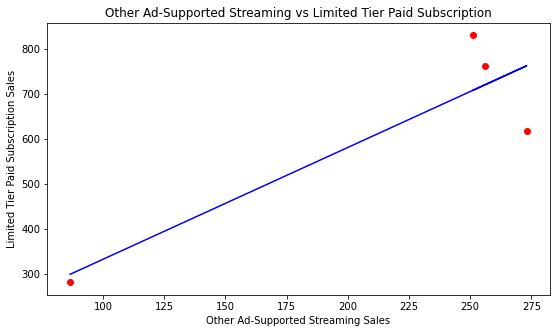

In [73]:
figure(figsize=(9, 5))
plt.plot(X,Y,'ro',X,ytrain,'b-')

plt.title("Other Ad-Supported Streaming vs Limited Tier Paid Subscription")
plt.xlabel("Other Ad-Supported Streaming Sales")
plt.ylabel("Limited Tier Paid Subscription Sales")

To test how well the model fits the data, I am calculating the mean squared error and R-squared value.

In [74]:
mean_squared_error(Y, ytrain)

9483.641410110005

In [75]:
r2_score(Y, ytrain)

0.787938970366586

Based on the R-squared value of 0.79, the model fits the data decently well. As a result, it seems **Other Ad-Supported Streaming sales can be used to predict Limited Tier Paid Subscription sales**. However, since data is only available for 2016-2019 for these sales formats, there might not be enough data to make this assumption 

Since Paid Subscription and On-Demand Streaming (Ad-Supported) sales have been highly correlated (r=0.985) since 2011, we may be able to use linear regression to predict On-Demand Streaming sales using Paid Subscription sales. 

In [76]:
# creating a new dataframe with the adjusted data from 2011 and after 
adjusted_2011_on = adjusted[adjusted['Year']>=2011]

In [77]:
PS = adjusted_2011_on[adjusted_2011_on["Format"] == 'Paid Subscription'][['Value (Actual)']]
OD = adjusted_2011_on[adjusted_2011_on["Format"] == 'On-Demand Streaming (Ad-Supported)'][['Value (Actual)']]
print (PS)
print (OD)

     Value (Actual)
321      281.639932
322      445.276306
323      706.011657
324      831.834028
325     1247.676869
326     2390.487545
327     3651.028327
328     4740.333581
329     5934.397625
     Value (Actual)
294      129.340695
295      190.339616
296      242.396098
297      306.475448
298      401.245264
299      521.288175
300      686.918081
301      773.294917
302      908.149331


In [78]:
reg = LinearRegression().fit(PS, OD)

In [79]:
reg.coef_

array([[0.13146726]])

In [80]:
reg.intercept_

array([166.67085972])

In [81]:
ytrain = reg.intercept_ + reg.coef_ * PS

Text(0, 0.5, 'On-Demand Streaming (Ad-Supported) Sales')

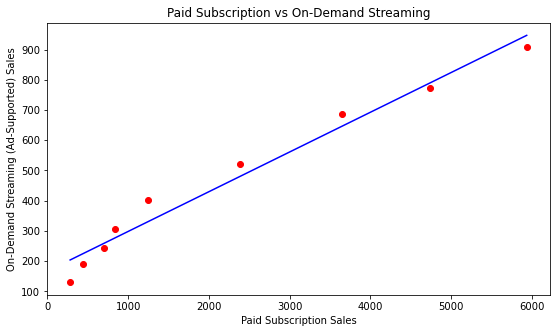

In [82]:
figure(figsize=(9, 5))
plt.plot(PS, OD,'ro',PS,ytrain,'b-')

plt.title("Paid Subscription vs On-Demand Streaming")
plt.xlabel("Paid Subscription Sales")
plt.ylabel("On-Demand Streaming (Ad-Supported) Sales")

In [83]:
mean_squared_error(OD, ytrain)

1995.723477381923

In [84]:
r2_score(OD, ytrain)

0.9705849522481601

The high R-squared value of 0.97 indicates that the regression line is a good fit for the data. As a result, **Paid Subscription sales can be used to predict On-Demand Streaming sales**.   

On-Demand Streaming (Ad-Supported) and Other-Ad Supported Streaming sales also have a high correlation (r=0.77). Thus, we might be able to predict Other Ad-Supported Streaming sales using On-Demand Streaming sales by finding the linear regression. 

In [85]:
# creating a dataframe with the adjusted data from 2016-2019
adjusted_2016_on = adjusted[adjusted['Year']>=2016]

In [86]:
DS = adjusted_2016_on[adjusted_2016_on["Format"] == 'On-Demand Streaming (Ad-Supported)'][['Value (Actual)']]
AS = adjusted_2016_on[adjusted_2016_on["Format"] == 'Other Ad-Supported Streaming'][['Value (Actual)']]
print (DS)
print (AS)

     Value (Actual)
299      521.288175
300      686.918081
301      773.294917
302      908.149331
     Value (Actual)
303       86.559597
304      273.040319
305      255.967444
306      251.064710


In [87]:
reg = LinearRegression().fit(DS, AS)

In [88]:
reg.coef_

array([[0.4131505]])

In [89]:
reg.intercept_

array([-81.80711775])

In [90]:
ytrain = reg.intercept_ + reg.coef_ * DS

Text(0, 0.5, 'Other Ad-Supported Streaming Sales')

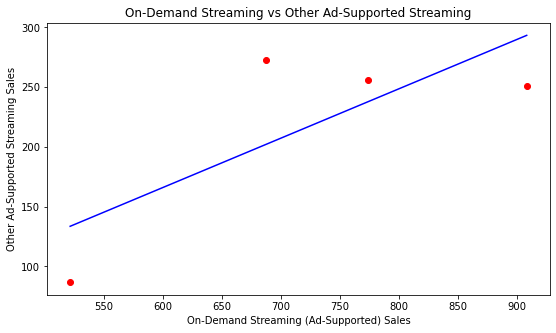

In [91]:
figure(figsize=(9, 5))
plt.plot(DS, AS,'ro',DS,ytrain,'b-')

plt.title("On-Demand Streaming vs Other Ad-Supported Streaming")
plt.xlabel("On-Demand Streaming (Ad-Supported) Sales")
plt.ylabel("Other Ad-Supported Streaming Sales")

In [92]:
mean_squared_error(AS, ytrain)

2345.82868062942

In [93]:
r2_score(AS, ytrain)

0.5890569706546729

The R-squared value of 0.59 indicates that the regression line is not a good fit for the data. As a result, **we cannot use On-Demand Streaming sales to predict Other Ad-Supported Streaming sales**. 

Paid Subscription and SoundExchange Distributions sales have a strong correlation (r=0.77). By finding the linear regression, we can can predict future SoundExchange Distributions sales using Paid Subscription sales.

In [94]:
# creating a dataframe with the adjusted data for sales since 2005
adjusted_2005_on = adjusted[adjusted['Year']>=2005]

In [95]:
PS2 = adjusted_2005_on[adjusted_2005_on["Format"] == 'Paid Subscription'][['Value (Actual)']]
SD = adjusted_2005_on[adjusted_2005_on["Format"] == 'SoundExchange Distributions'][['Value (Actual)']]
print (PS2)
print (SD)

     Value (Actual)
315      195.309905
316      261.490444
317      288.585326
318      262.896754
319      245.722059
320      249.025694
321      281.639932
322      445.276306
323      706.011657
324      831.834028
325     1247.676869
326     2390.487545
327     3651.028327
328     4740.333581
329     5934.397625
     Value (Actual)
363       26.704571
364       41.594988
365       44.644397
366      118.742888
367      185.304463
368      292.171389
369      331.875949
370      514.445212
371      647.930274
372      835.213587
373      865.719793
374      941.535965
375      680.027595
376      970.064513
377      908.200000


In [96]:
reg = LinearRegression().fit(PS2, SD)

In [97]:
reg.coef_

array([[0.13828152]])

In [98]:
reg.intercept_

array([293.27206305])

In [99]:
ytrain = reg.intercept_ + reg.coef_ * PS2

Text(0, 0.5, 'SoundExchange Distributions Sales')

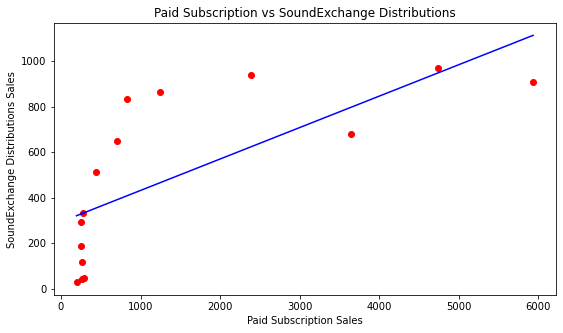

In [100]:
figure(figsize=(9, 5))
plt.plot(PS2, SD,'ro',PS2,ytrain,'b-')

plt.title("Paid Subscription vs SoundExchange Distributions")
plt.xlabel("Paid Subscription Sales")
plt.ylabel("SoundExchange Distributions Sales")

In [101]:
mean_squared_error(SD, ytrain)

60636.34678105076

In [102]:
r2_score(SD, ytrain)

0.5056529285525253

As with the previous regression, the regression line does not fit the data, as indicated by the R-squared value of 0.5. Consequently, **Paid Subscription sales cannot be used to predict SoundExchange Distribution sales**.

The last formats I found to be highly correlated are Download Album and Download Single sales (r=0.93). We can predict future Download Album sales using Download Single sales by finding the linear regression.

In [103]:
# creating a dataframe with the adjusted data since 2004
adjusted_2004_on = adjusted[adjusted['Year']>=2004]

In [104]:
DS = adjusted_2004_on[adjusted_2004_on["Format"] == 'Download Single'][['Value (Actual)']]
DA = adjusted_2004_on[adjusted_2004_on["Format"] == 'Download Album'][['Value (Actual)']]
print (DS)
print (DA)

     Value (Actual)
181      186.769010
182      475.577000
183      736.282015
184     1000.182475
185     1225.664089
186     1396.635564
187     1566.845282
188     1730.301179
189     1831.258646
190     1726.739156
191     1463.655387
192     1278.449595
193      958.879103
194      707.692711
195      499.316974
196      414.804251
     Value (Actual)
150       61.579637
151      177.637762
152      349.879793
153      613.428807
154      754.373567
155      886.958917
156     1022.834349
157     1217.030020
158     1341.590983
159     1352.202953
160     1207.247578
161     1148.145081
162      925.232201
163      697.237618
164      508.704388
165      394.533006


In [105]:
reg = LinearRegression().fit(DS, DA)

In [106]:
reg.coef_

array([[0.73282105]])

In [107]:
reg.intercept_

array([3.42431643])

In [108]:
ytrain = reg.intercept_ + reg.coef_ * DS

Text(0, 0.5, 'Download Album')

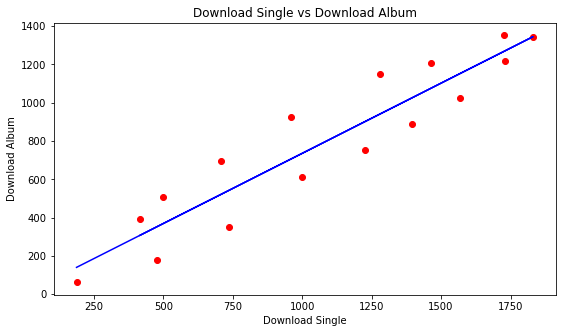

In [109]:
figure(figsize=(9, 5))
plt.plot(DS, DA,'ro',DS,ytrain,'b-')

plt.title("Download Single vs Download Album")
plt.xlabel("Download Single")
plt.ylabel("Download Album")

In [110]:
mean_squared_error(DA, ytrain)

20182.09275609223

In [111]:
r2_score(DA, ytrain)

0.8739989556668669

An R-squared of 0.87 indicates that the regression line sufficiently fits the data. Resultantly, **Download Single sales can be used to predict Download Album sales**.

Next, I am going to perform linear regression on the sales formats that are **negatively correlated** in order to see which sales formats can be used to accurately predict other sales formats.

Since Paid Subscription sales and CD sales are negatively correlated, (r=-0.57), we might be able to predict CD sales based on Paid Subscription sales using linear regression.

In [157]:
PS2 = adjusted_2005_on[adjusted_2005_on["Format"] == 'Paid Subscription'][['Value (Actual)']]
CD = adjusted_2005_on[adjusted_2005_on["Format"] == 'CD'][['Value (Actual)']]
print (PS2)
print (CD)

     Value (Actual)
315      195.309905
316      261.490444
317      288.585326
318      262.896754
319      245.722059
320      249.025694
321      281.639932
322      445.276306
323      706.011657
324      831.834028
325     1247.676869
326     2390.487545
327     3651.028327
328     4740.333581
329     5934.397625
    Value (Actual)
32    13771.442760
33    11885.767850
34     9190.702658
35     6496.779627
36     5146.578220
37     3973.859173
38     3524.136143
39     2767.776149
40     2349.534897
41     1918.215115
42     1558.633452
43     1204.497778
44     1102.774352
45      711.041239
46      614.509780


In [147]:
reg = LinearRegression().fit(PS2, CD)

In [148]:
reg.coef_

array([[-1.27787903]])

In [149]:
reg.intercept_

array([6265.78356157])

In [150]:
ytrain = reg.intercept_ + reg.coef_ * PS2

Text(0, 0.5, 'CD Sales')

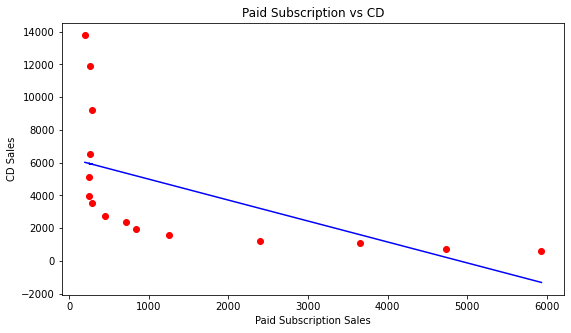

In [153]:
figure(figsize=(9, 5))
plt.plot(PS2,CD,'ro',PS2,ytrain,'b-')

plt.title("Paid Subscription vs CD")
plt.xlabel("Paid Subscription Sales")
plt.ylabel("CD Sales")

In [154]:
mean_squared_error(CD, ytrain)

10892202.708141036

In [155]:
r2_score(CD, ytrain)

0.32718062980422935

Based on the extremely high mean squared error and low R-squared value, this regression line does not fit the data well. As a result, **CD sales cannot be predicted based on Paid Subscription sales**, as the correlation isn't high enough.

Since On-Demand Streaming (Ad-Supported) sales and CD sales are negatively correlated, (r=-0.93), we might be able to predict CD sales based on On-Demand Streaming sales using linear regression.

In [159]:
OD = adjusted_2011_on[adjusted_2011_on["Format"] == 'On-Demand Streaming (Ad-Supported)'][['Value (Actual)']]
CD2 = adjusted_2011_on[adjusted_2011_on["Format"] == 'CD'][['Value (Actual)']]
print (OD)
print (CD2)

     Value (Actual)
294      129.340695
295      190.339616
296      242.396098
297      306.475448
298      401.245264
299      521.288175
300      686.918081
301      773.294917
302      908.149331
    Value (Actual)
38     3524.136143
39     2767.776149
40     2349.534897
41     1918.215115
42     1558.633452
43     1204.497778
44     1102.774352
45      711.041239
46      614.509780


In [160]:
reg = LinearRegression().fit(OD, CD2)

In [161]:
reg.coef_

array([[-3.30941107]])

In [162]:
reg.intercept_

array([3279.60454803])

In [163]:
ytrain = reg.intercept_ + reg.coef_ * OD

Text(0, 0.5, 'CD Sales')

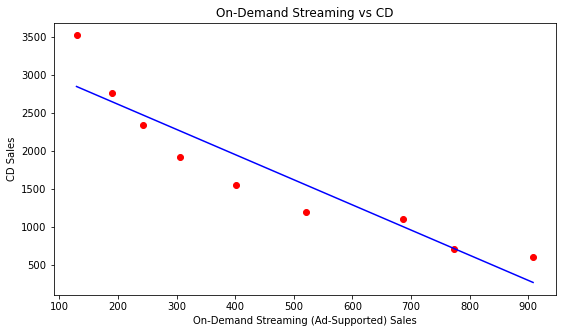

In [165]:
figure(figsize=(9, 5))
plt.plot(OD,CD2,'ro',OD,ytrain,'b-')

plt.title("On-Demand Streaming vs CD")
plt.xlabel("On-Demand Streaming (Ad-Supported) Sales")
plt.ylabel("CD Sales")

In [168]:
mean_squared_error(CD2, ytrain)

111707.23908765972

In [169]:
r2_score(CD2, ytrain)

0.8693148667917903

While the mean squared error value is quite high, the R-squared of 0.87 implies that the regression line sufficiently fits the data. Therefore, **we can use On-Demand Streaming Sales to predict CD Sales** using this regression line.

On-Demand Streaming (Ad-Supported) sales and Download Album sales are very negatively correlated, (r=-0.97). As a result, we might be able to use linear regression to predict On-Demand Streaming sales using Download Album sales.

In [170]:
DA2 = adjusted_2011_on[adjusted_2011_on["Format"] == 'Download Album'][['Value (Actual)']]
OD = adjusted_2011_on[adjusted_2011_on["Format"] == 'On-Demand Streaming (Ad-Supported)'][['Value (Actual)']]
print (DA2)
print (OD)

     Value (Actual)
157     1217.030020
158     1341.590983
159     1352.202953
160     1207.247578
161     1148.145081
162      925.232201
163      697.237618
164      508.704388
165      394.533006
     Value (Actual)
294      129.340695
295      190.339616
296      242.396098
297      306.475448
298      401.245264
299      521.288175
300      686.918081
301      773.294917
302      908.149331


In [171]:
reg = LinearRegression().fit(DA2, OD)

In [172]:
reg.coef_

array([[-0.73982141]])

In [173]:
reg.intercept_

array([1184.87789656])

In [174]:
ytrain = reg.intercept_ + reg.coef_ * DA2

Text(0, 0.5, 'On-Demand Streaming (Ad-Supported) Sales')

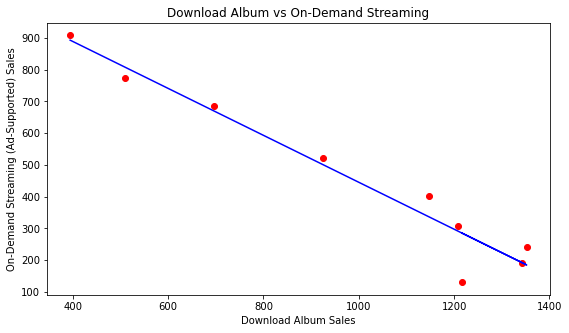

In [175]:
figure(figsize=(9, 5))
plt.plot(DA2,OD,'ro',DA2,ytrain,'b-')

plt.title("Download Album vs On-Demand Streaming")
plt.xlabel("Download Album Sales")
plt.ylabel("On-Demand Streaming (Ad-Supported) Sales")

In [176]:
mean_squared_error(OD, ytrain)

3800.3429942908488

In [177]:
r2_score(OD, ytrain)

0.9439865933746077

The high R-squared value of 0.94 demonstrates that the regression line fits the data very well. As a result, **we should be able to predict On-Demand Streaming sales by looking at Download Album sales**.

Lastly, CD Single sales and Download Single sales are also negatively correlated (r=-0.4). This correlation is on the lower end, but I am still going to perform linear regression to see if we can predict Download Single sales based on CD Single sales.

In [179]:
CDS = adjusted_2004_on[adjusted_2004_on["Format"] == 'CD Single'][['Value (Actual)']]
DS = adjusted_2004_on[adjusted_2004_on["Format"] == 'Download Single'][['Value (Actual)']]
print (CDS)
print (DS)

    Value (Actual)
63       20.300979
64       14.268619
65        9.764677
66       15.045902
67        4.156001
68        3.694173
69        3.400068
70        3.977965
71        3.591198
72        2.684057
73        3.905024
74        1.291079
75        0.280361
76        1.542259
77        0.157981
78        0.181679
     Value (Actual)
181      186.769010
182      475.577000
183      736.282015
184     1000.182475
185     1225.664089
186     1396.635564
187     1566.845282
188     1730.301179
189     1831.258646
190     1726.739156
191     1463.655387
192     1278.449595
193      958.879103
194      707.692711
195      499.316974
196      414.804251


In [180]:
reg = LinearRegression().fit(CDS, DS)

In [181]:
reg.coef_

array([[-35.51411031]])

In [182]:
reg.intercept_

array([1270.80558653])

In [183]:
ytrain = reg.intercept_ + reg.coef_ * CDS

Text(0, 0.5, 'Download Single Sales')

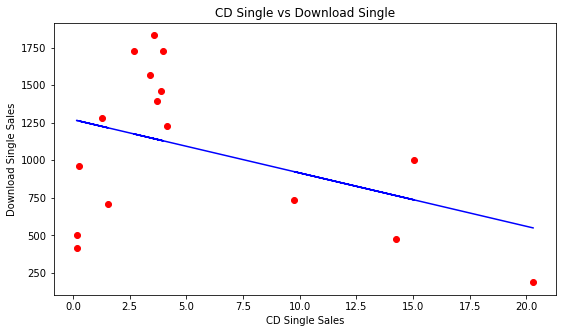

In [185]:
figure(figsize=(9, 5))
plt.plot(CDS,DS,'ro',CDS,ytrain,'b-')

plt.title("CD Single vs Download Single")
plt.xlabel("CD Single Sales")
plt.ylabel("Download Single Sales")

In [186]:
mean_squared_error(DS, ytrain)

217432.7641589061

In [187]:
r2_score(DS, ytrain)

0.16590044982021035

As I predicted, the correlation between CD Single sales and Download Single sales isn't strong enough to create an accurate regression line. As indicated by the high mean squared error and low R-squared value, **Download Single sales cannot be predicted based on CD Single sales**.

In summary, the linear regression analysis revealed that a few of the sales formats have a strong enough correlation that sales of one can predict sales of the other. The results revealed that: Limited Tier Paid Subscription sales can be predicted based on Other Ad-Supported Streaming sales, On-Demand Streaming sales can be predicted based on Paid Subscription sales, and Download Album sales can be predicted by looking at Download Single sales. As a result, we can expect that if one of the sales formats sees an increase in sales and popularity, the correlated sales format will also see an increase in sales and popularity. Similarly, if one sales format sees a decrease in sales, then the correlated sales format will most likely also see a decrease in sales. 

For the negatively correlated formats, the linear regression analysis revealed that: CD sales can be predicted using On-Demand Streaming sales, and On-Demand Streaming sales can be predicted by looking at Download Album sales. More specifically, a decrease in CD sales can be predicted by an increase in On-Demand Streaming sales and an increase in On-Demand Streaming sales can be predicted by a decrease in Download Album sales.

### Growth Rate Analysis

As a last step in my analysis, I am going to look at the growth rates of popular sales formats in 2019. This information will help to predict which formats might have high growth in the near future.

Popular sales formats in recent years include: Other Ad-Supported Streaming, Paid Subscription, Synchronization, On-Demand Streaming (Ad-Supported), Limited Tier Paid Subscription, Other Digital Sales, SoundExchange Distributions, CDs, LP/EP, Download Single, and Download Album.

Other Ad-Supported Streaming:

In [189]:
format_dfs[2]['Value (Actual)'].pct_change(periods=1)

303         NaN
304    2.154362
305   -0.062529
306   -0.019154
Name: Value (Actual), dtype: float64

In 2019, **Other Ad-Supported Streaming sales decreased by 1.9%.**

Paid Subscription:

In [125]:
format_dfs[3]['Value (Actual)'].pct_change(periods=1)

315         NaN
316    0.338849
317    0.103617
318   -0.089016
319   -0.065329
320    0.013445
321    0.130967
322    0.581013
323    0.585559
324    0.178216
325    0.499911
326    0.915951
327    0.527315
328    0.298356
329    0.251895
Name: Value (Actual), dtype: float64

In  2019, **Paid Subscription sales increased by 25%.**

Synchronization:

In [128]:
format_dfs[4]['Value (Actual)'].pct_change(periods=1)

378         NaN
379   -0.077263
380    0.009471
381   -0.049703
382   -0.019185
383   -0.015788
384    0.068425
385    0.045471
386    0.057748
387    0.200872
388   -0.049622
Name: Value (Actual), dtype: float64

In 2019, **Synchronization sales decreased by 4.96%.**

On-Demand Streaming (Ad-Supported):

In [191]:
format_dfs[6]['Value (Actual)'].pct_change(periods=1)

294         NaN
295    0.471614
296    0.273493
297    0.264358
298    0.309225
299    0.299176
300    0.317732
301    0.125745
302    0.174389
Name: Value (Actual), dtype: float64

In 2019, **On-Demand Streaming (Ad-Supported) sales increased by 17.4%.**

Limited Tier Paid Subscription:

In [134]:
format_dfs[7]['Value (Actual)'].pct_change(periods=1)

259         NaN
260    1.199471
261    0.232661
262    0.090597
Name: Value (Actual), dtype: float64

In 2019, **Limited Tier Paid Subscription sales increased by 9.1%.**

Other Digital:

In [137]:
format_dfs[16]['Value (Actual)'].pct_change(periods=1)

307         NaN
308   -0.035514
309    0.146960
310    0.065256
Name: Value (Actual), dtype: float64

In 2019, **Other Digital sales increased by 6.5%.**

SoundExchange Distributions:

In [140]:
format_dfs[18]['Value (Actual)'].pct_change(periods=1)

362         NaN
363    1.859636
364    0.557598
365    0.073312
366    1.659749
367    0.560552
368    0.576710
369    0.135895
370    0.550113
371    0.259474
372    0.289049
373    0.036525
374    0.087576
375   -0.277747
376    0.426508
377   -0.063774
Name: Value (Actual), dtype: float64

In 2019, **SoundExchange Distributions sales decreased by 6.4%.**

CDs:

In [194]:
format_dfs[10]['Value (Actual)'].pct_change(periods=1)

10         NaN
11    4.757258
12    2.640914
13    1.344358
14    0.653034
15    0.259331
16    0.181276
17    0.265472
18    0.205973
19    0.192070
20    0.186922
21    0.267496
22    0.077319
23    0.029045
24   -0.024359
25    0.133716
26    0.098402
27   -0.002461
28   -0.050117
29   -0.081550
30   -0.088134
31   -0.007417
32   -0.111043
33   -0.136926
34   -0.226747
35   -0.293114
36   -0.207826
37   -0.227864
38   -0.113170
39   -0.214623
40   -0.151111
41   -0.183577
42   -0.187456
43   -0.227209
44   -0.084453
45   -0.355225
46   -0.135761
Name: Value (Actual), dtype: float64

In 2019, **CD sales decreased by 13.6%.**

LP/EP:

In [195]:
format_dfs[19]['Value (Actual)'].pct_change(periods=1)

212         NaN
213   -0.019884
214    0.003532
215    0.058853
216    0.239372
217    0.047243
218   -0.253090
219   -0.057681
220   -0.035123
221   -0.225612
222   -0.149950
223   -0.120958
224   -0.201661
225   -0.246340
226   -0.221593
227   -0.355622
228   -0.605086
229   -0.627482
230   -0.673841
231   -0.554235
232   -0.237637
233    0.637321
234    0.371251
235    0.424086
236   -0.115405
237    0.005361
238   -0.084916
239   -0.157258
240   -0.038199
241   -0.263470
242    0.034950
243   -0.133670
244   -0.288359
245    0.071083
246    0.418493
247    1.383948
248    0.129238
249    0.370930
250    0.301985
251    0.318797
252    0.292265
253    0.138633
254    0.365548
255    0.052862
256    0.070270
257    0.053325
258    0.165805
Name: Value (Actual), dtype: float64

In 2019, **LP/EP sales increased by 16.6%.**

Download Single:

In [196]:
format_dfs[20]['Value (Actual)'].pct_change(periods=1)

181         NaN
182    1.546338
183    0.548187
184    0.358423
185    0.225440
186    0.139493
187    0.121871
188    0.104322
189    0.058347
190   -0.057075
191   -0.152359
192   -0.126536
193   -0.249967
194   -0.261958
195   -0.294444
196   -0.169257
Name: Value (Actual), dtype: float64

In 2019, **Download Single sales decreased by 16.9%.**

Download Album:

In [199]:
format_dfs[1]['Value (Actual)'].pct_change(periods=1)

150         NaN
151    1.884683
152    0.969625
153    0.753256
154    0.229765
155    0.175756
156    0.153192
157    0.189860
158    0.102348
159    0.007910
160   -0.107199
161   -0.048956
162   -0.194150
163   -0.246419
164   -0.270400
165   -0.224436
Name: Value (Actual), dtype: float64

In 2019, **Download Album sales decreased by 22.4%.**

By looking at the sales growth rates for each sales format in 2019, we are able to see which formats have increasing sales and which have decreasing sales. If we assume these trends will continue into the near future, we can predict which sales formats will be most popular going forward as well as which formats are being used less. 

Sales formats that saw positive growth in 2019 include Paid Subscription sales, On-Demand Streaming (Ad-Supported) sales, LP/EP sales, Limited Tier Paid Subscription sales, and Other Digital sales. As a result, I expect that these sales formats will continue to increase in the near future and they will eventually make up the majority of all music industry sales. Paid Subscription services not only had the highest sales of all the formats in 2018, but also saw the largest increase in sales in 2019, increasing 25%. Looking at the sales formats that are increasing in popularity, we can see that streaming services, both paid and free, are taking over the music industry as the most popular way to consume music. In addition to streaming services, it seems that LP albums and EP albums are also making a comeback in terms of popularity. 

Sales formats that saw negative growth in 2019 include Download Album sales, Download Single sales, CD sales, SoundExchange Distributions sales, Synchronization sales, and Other Ad-Supported Streaming sales. It is reasonable to assume that the majority of these formats are decreasing in popularity and thus sales in these formats will continue to decrease into the future. Download Album, Download Single, and CD sales saw the largest decrease by far, demonstrating that consumers are steering away from downloading music or buying "hard copies". Instead, consumers are getting their music from streaming services like Spotify, Apple Music, and Pandora or opting to buy LP/EP albums instead. 

## Discussion 

Through my analysis, I revealed how music industry sales have changed since 1973 and especially throughout the 2000's. Music industry sales have been greatly affected by technology, as consumers now have access to a plethora of music formats that didn't even exist 15 years ago. My analysis revealed which music sale formats have been strongly correlated in the 2000s and which formats have been strongly anti-correlated. Since correlation doesn't imply causation, I cannot say that certain formats led to the demise of other formats. But, it is interesting to see how the rise of new formats is correlated to the decline of more traditional music formats. In my correlation analysis, I found that streaming formats were highly correlated with other streaming formats, meaning that sales of both increased similarly during the 2000s. More specifically, I found: 

(1) Other Ad-Supported Streaming and Limited Tier Paid Subscription sales to be highly correlated,

(2) Paid Subscription and On-Demand Streaming (Ad-Supported) sales to be highly correlated,

(3) On-Demand Streaming (Ad-Supported) and Other Ad-Supported Streaming sales to be highly correlated,

(4) Paid Subscription and SoundExchange Distributions sales to be highly correlated, and

(5) Download Album and Download Single sales to be highly correlated.

In contrast, I found that streaming formats were very anti-correlated with older sales formats. While these streaming formats saw increased sales throughout the 2000's, the older sales formats had large decreases in sales. To be specific, I found: 

(1) Paid Subscription and CD sales to be moderately anti-correlated,

(2) On-Demand Streaming (Ad-Supported) and CD sales to be very anti-correlated,

(3) Paid Subscription and Cassette sales to be very anti-correlated,

(4) On-Demand Streaming (Ad-Supported) and Download Album sales to be very anti-correlated, and

(5) CD Single and Download Single sales to be moderately anti-correlated.

My analysis also reveals where music industry sales may be focused in the future. Plotting the different sales formats revealed that a number of them have been steadily increasing in recent years. The formats that have seen increasing sales over the past few years are 

(1) Synchronizations, 

(2) Paid Subscriptions, 

(3) On-Demand Streaming (Ad-Supported),

(4) Limited Tier Paid Subscriptions,

(5) Other Digital,

(6) SoundExchange Distributions, and

(7) LP/EP. 

Formats that have seen decreasing sales over the past few years include:

(1) Download Music Video,

(2) Download Album,

(3) Other Ad-Supported Streaming,

(4) Ringtones and Ringbacks,

(5) CDs,

(6) Vinyl Singles,

(7) CD Singles,

(8) Kiosks,

(9) DVD Audios,

(10) SACDs,

(11) Download Single, and

(12) Music Video (Physical).

It is clear that sales are shifting away from traditional sales formats like owning an album to technology-based formats like streaming an album. Additionally, it appears that consumers like the flexibility streaming platforms provide to jump from one artist to another, without having to commit to a whole album. As a result, I would advise artists and managers to shift away from these formats. Instead of focusing on promoting an album in order to increase album sales, artists should focus their strategy and marketing efforts on streaming platforms. By putting their music on platforms like Spotify and Apple Music, artists will not only expose their music to a wider audience but also put themselves in a better place to make sales. 

My analysis also demonstrated how quickly popularity of music sales formats shifts. These new sales formats that are seeing high growth now will probably continue to grow into the near future, but as even newer formats are made available, they too will begin to see decreased sales. Therefore, it is imperative that people in the music industry monitor new technologies and changes in the landscapes so they can stay on top of new trends. My correlation and linear regression analysis revealed which formats's sales are closely correlated. In the future, if we begin to see a decrease in a particular sales format, we should be cautious of a decrease in the correlated sales format as well. In conclusion, my analysis provided insight into the past and future of music industry sales. This analysis is of interest to me as I feel I now have a much stronger understanding of the music industry sales landscape and where the industry is heading in the future. With this knowledge, artists, managers, and others working in the industry can hopefully better focus their marketing and predict potential sales avenues. 